In [1]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [51]:
df = pd.read_csv('C:\data\loan_prediction.csv')
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [52]:
# Check data Shape
df.shape

(614, 13)

In [53]:
# Check data Information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [54]:
# Statistical Summery
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [55]:
# Check Null Values
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [56]:
# fill the missing values in the continuous variable columns with its respective mean
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].mean())
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean())
df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].mean())
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.000000,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.000000,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.000000,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.000000,360.0,1.0,Urban,Y


In [57]:
df['Gender'].mode()[0]

'Male'

In [58]:
# fill the missing values of columns which have discrete/categorical data with its mode
df['Gender'] = df["Gender"].fillna(df['Gender'].mode()[0])
df['Married'] = df["Married"].fillna(df['Married'].mode()[0])
df['Dependents'] = df["Dependents"].fillna(df['Dependents'].mode()[0])
df['Property_Area'] = df["Property_Area"].fillna(df['Property_Area'].mode()[0])
df['Self_Employed'] = df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])

In [59]:
# Check again Null values Available or not in our data base
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

# EDA

<AxesSubplot:>

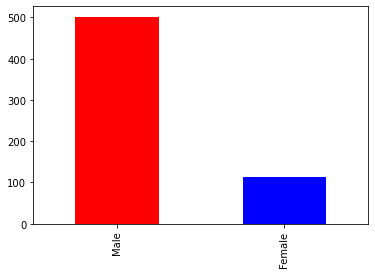

In [60]:
# Check Male female ratio
df['Gender'].value_counts().plot(kind='bar', color=['r','b'])

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

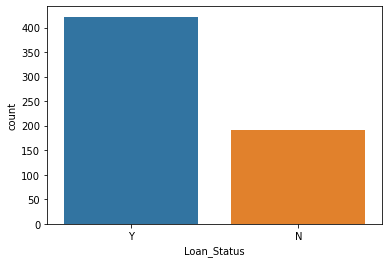

In [61]:
# Check Ratio of Loan approval/rejections
sns.countplot(df['Loan_Status'])

<AxesSubplot:xlabel='Dependents', ylabel='count'>

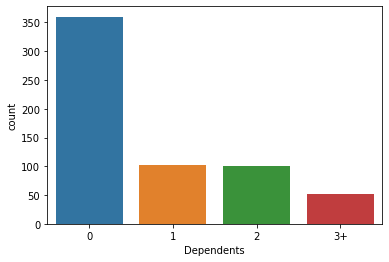

In [62]:
# Find out whether most applicants have dependents or not
sns.countplot(df['Dependents'])

<AxesSubplot:xlabel='ApplicantIncome', ylabel='Density'>

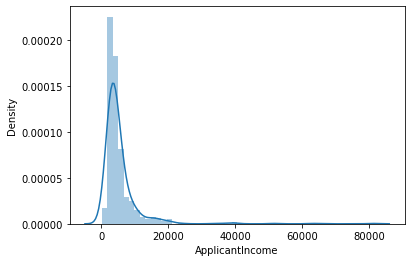

In [63]:
# distrubution of salary of applicants
sns.distplot(df['ApplicantIncome'])

<AxesSubplot:xlabel='CoapplicantIncome', ylabel='Density'>

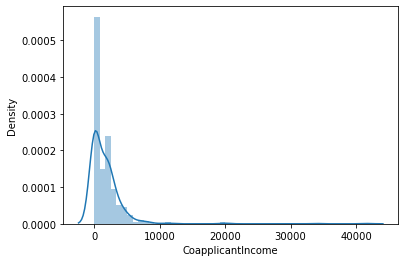

In [64]:
# distrubution of salary of co-applicants
sns.distplot(df['CoapplicantIncome'])

In [65]:
# Calculate Total combined income of applicats and plot distributions
df['Total_Income'] = df['ApplicantIncome'] + df['CoapplicantIncome']
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,5849.0
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,6091.0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,3000.0
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,4941.0
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,6000.0


# Log Transformation

In [66]:
df['ApplicantIncomeLog'] = np.log(df['ApplicantIncome'])
df['CoapplicantIncomeLog'] = np.log(df['CoapplicantIncome'])
df['LoanAmountLog'] = np.log(df['LoanAmount'])
df['Loan_Amount_Term_Log'] = np.log(df['Loan_Amount_Term'])
df['Total_Income_Log'] = np.log(df['Total_Income'])

<AxesSubplot:xlabel='ApplicantIncomeLog', ylabel='Density'>

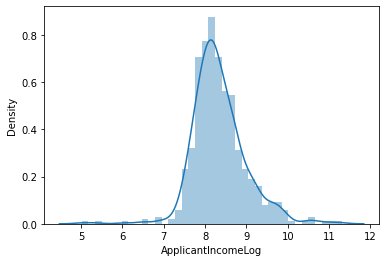

In [67]:
sns.distplot(df['ApplicantIncomeLog'])

# Label Encoder

In [68]:
from sklearn.preprocessing import LabelEncoder

In [69]:
df = df.drop(['Loan_ID'],axis=1)

In [70]:
cols = ['Gender','Married', 'Education', 'Self_Employed', 'Property_Area','Loan_Status','Dependents']
le = LabelEncoder()
for col in cols:
    df[col] = le.fit_transform(df[col])

In [71]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income,ApplicantIncomeLog,CoapplicantIncomeLog,LoanAmountLog,Loan_Amount_Term_Log,Total_Income_Log
0,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1,5849.0,8.674026,-inf,4.986426,5.886104,8.674026
1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0,6091.0,8.430109,7.318540,4.852030,5.886104,8.714568
2,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1,3000.0,8.006368,-inf,4.189655,5.886104,8.006368
3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1,4941.0,7.856707,7.765569,4.787492,5.886104,8.505323
4,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1,6000.0,8.699515,-inf,4.948760,5.886104,8.699515


<AxesSubplot:>

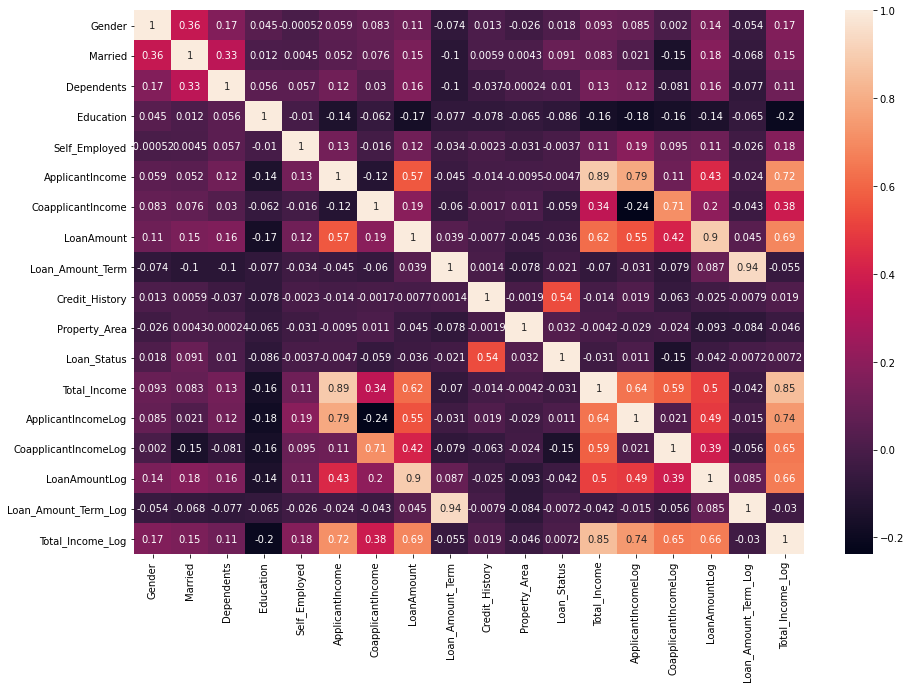

In [72]:
# Check  Correlation between variables and visualize in the form of a matrix
corr=df.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr, annot = True)

In [73]:
cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Total_Income', 'CoapplicantIncomeLog']
df = df.drop(columns=cols,axis=1)

In [74]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,ApplicantIncomeLog,LoanAmountLog,Loan_Amount_Term_Log,Total_Income_Log
0,1,0,0,0,0,1.0,2,1,8.674026,4.986426,5.886104,8.674026
1,1,1,1,0,0,1.0,0,0,8.430109,4.852030,5.886104,8.714568
2,1,1,0,0,1,1.0,2,1,8.006368,4.189655,5.886104,8.006368
3,1,1,0,1,0,1.0,2,1,7.856707,4.787492,5.886104,8.505323
4,1,0,0,0,0,1.0,2,1,8.699515,4.948760,5.886104,8.699515


In [75]:
# specify input and output attribute
X = df.drop(['Loan_Status'],axis=1) #Input
y = df['Loan_Status'] #Output

# Feature Engineering

In [76]:
# select k best features
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [77]:
# apply k-best algorithm and score features within the dataset
kbest = SelectKBest(score_func = chi2, k = 'all')
ordered_features = kbest.fit(X,y)

In [78]:
df_scores = pd.DataFrame(ordered_features.scores_, columns=['Score'])
df_columns = pd.DataFrame(X.columns, columns = ['Feature_name'])
feature_rank = pd.concat([df_scores,df_columns],axis=1)
feature_rank

,Score,Feature_name
0,0.036234,Gender
1,1.782425,Married
2,0.085953,Dependents
3,3.540502,Education
4,0.007285,Self_Employed
5,25.998867,Credit_History
6,0.377837,Property_Area
7,0.003687,ApplicantIncomeLog
8,0.054512,LoanAmountLog
9,0.000539,Loan_Amount_Term_Log


In [79]:
# Sort by hightest 11 scores
feature_rank.nlargest(11,'Score')

,Score,Feature_name
5,25.998867,Credit_History
3,3.540502,Education
1,1.782425,Married
6,0.377837,Property_Area
2,0.085953,Dependents
8,0.054512,LoanAmountLog
0,0.036234,Gender
4,0.007285,Self_Employed
7,0.003687,ApplicantIncomeLog
10,0.001101,Total_Income_Log


# Feature importance analysis
- Use Extremely Randomized Trees Classifier to rank importance of features

- The algorithm builds a set of decorrelated decision trees using random sample of k features (to prevent overfitting) from the dataset.
- Each decision tree must select the best feature to split the data based on GINI Index (representing importance).
- Importance of feature is judged according to GINI importance.

In [80]:
from sklearn.ensemble import ExtraTreesClassifier

In [81]:
model = ExtraTreesClassifier()
model.fit(X,y)

ExtraTreesClassifier()

In [82]:
model.feature_importances_

array([0.02355394, 0.02033787, 0.0566471 , 0.01799185, 0.02303345,
       0.29176673, 0.047878  , 0.15370761, 0.15580897, 0.0536613 ,
       0.15561318])

In [83]:
ranked_features = pd.Series(model.feature_importances_, index = X.columns)

<AxesSubplot:>

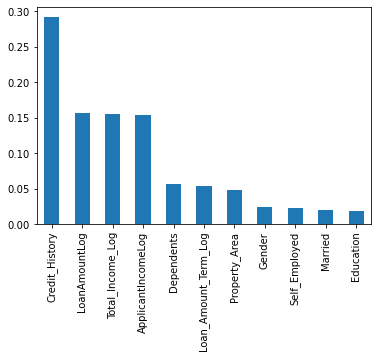

In [84]:
ranked_features.nlargest(11).plot(kind='bar')

 # Information gain
- It calculates mutual information value for each of independent variables with respect to dependent variable, and selects the ones which has most information gain. The higher score means more dependent variables.

In [85]:
from sklearn.feature_selection import mutual_info_classif
mu_ifo = mutual_info_classif(X,y)

In [86]:
mu_data = pd.Series(mu_ifo, index = X.columns)
mu_data.sort_values(ascending=False)

Credit_History          0.145948
Property_Area           0.040883
Loan_Amount_Term_Log    0.017869
Education               0.015778
Dependents              0.003951
ApplicantIncomeLog      0.003297
Married                 0.001340
Gender                  0.000000
Self_Employed           0.000000
LoanAmountLog           0.000000
Total_Income_Log        0.000000
dtype: float64

# Train Test Split

In [87]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y, test_size = 0.2, random_state=42)

In [88]:
from sklearn.model_selection import cross_val_score

In [89]:
def classify(model, x, y):
    x_train,x_test,y_train,y_test = train_test_split(X,y, test_size = 0.2, random_state=42)
    model.fit(x_train,y_train)
    print('Accuracy is: ', model.score(x_test,y_test)*100)
    score = cross_val_score(model,x,y,cv=5)
    print('Cross validation Accuaracy: ', np.mean(score)*100)

In [90]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
classify(clf, X,y)

Accuracy is:  78.86178861788618
Cross validation Accuaracy:  80.9462881514061


In [91]:
from sklearn.svm import SVC
clf = SVC(kernel='linear', C = 1)
classify(clf, X,y)

Accuracy is:  78.86178861788618
Cross validation Accuaracy:  80.9462881514061


In [92]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
classify(knn,X,y)

Accuracy is:  71.54471544715447
Cross validation Accuaracy:  75.56977209116353
